In [1]:
# init

from pprint import pprint

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

import numpy as np
import pandas as pd

# ref: http://scikit-learn.org/stable/modules/feature_extraction.html
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# http://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics
from sklearn.model_selection import train_test_split
# ref: http://scikit-learn.org/stable/modules/svm.html#regression
from sklearn import svm

In [2]:
# sample data and targets

N = 100

sampled_lines = []
#with open('corpus.txt') as f:
with open('corpus1.txt') as f:
    for i in range(N):
        sampled_lines.append(next(f))
        
sampled_targets = []
with open('target.txt') as f:
    for i in range(N):
        sampled_targets.append(int(next(f)))
        
# sampled_lines = [
#     'hello world',
#     'hello mosky',
# ]

# sampled_lines

In [3]:
# vectorize

# The default configuration tokenizes the string by extracting words of at least 2 letters.
vectorizer = CountVectorizer(min_df=1, analyzer=lambda s: s.split(' '))
line_term_count_sm = vectorizer.fit_transform(sampled_lines)
line_term_count_sm
#pprint(vectorizer.vocabulary_)
#pprint(line_term_count_m.toarray())

<100x9509 sparse matrix of type '<class 'numpy.int64'>'
	with 20645 stored elements in Compressed Sparse Row format>

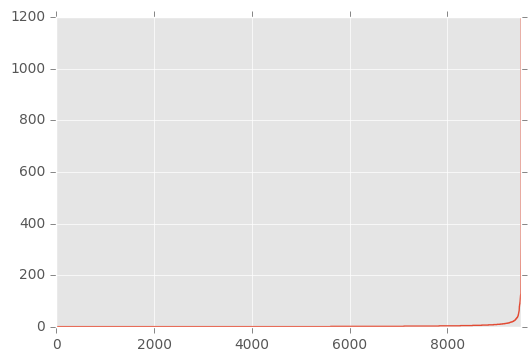

In [4]:
# plot the term-count

line_term_count_a = line_term_count_sm.toarray()
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
term_count_a = line_term_count_a.sum(axis=0)
#print(term_count_a.shape)

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html#numpy.sort
# .sort will sort in-place
sorted_term_count_a = np.sort(term_count_a)
term_count_s = pd.Series(sorted_term_count_a)
term_count_s.plot()

In [5]:
# print top count terms

# cidx: column index
cidx_term_map = {cidx: term for term, cidx in vectorizer.vocabulary_.items()}
sorted_term_idx_a = term_count_a.argsort()
print(cidx_term_map[sorted_term_idx_a[-1]])
print(cidx_term_map[sorted_term_idx_a[-2]])
print(cidx_term_map[sorted_term_idx_a[-3]])
print(cidx_term_map[sorted_term_idx_a[-10]])
#print(cidx_term_map[sorted_term_idx_a[-100]])
#print(cidx_term_map[sorted_term_idx_a[-1000]])
#print(cidx_term_map[sorted_term_idx_a[-10000]])
#print(cidx_term_map[sorted_term_idx_a[-100000]])

的
在
是
與


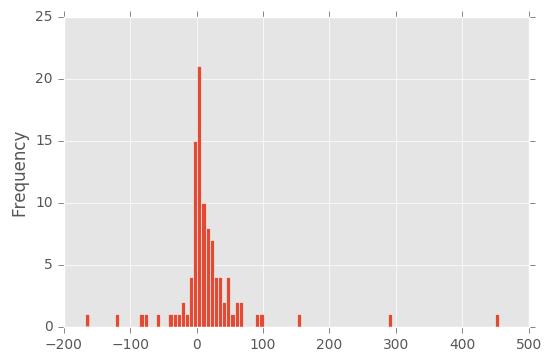

In [6]:
from collections import Counter
s = pd.Series(sampled_targets)
s.plot.hist(bins=100)

In [7]:
transformer = TfidfTransformer()
line_term_tfidf_sm = transformer.fit_transform(line_term_count_sm)
line_term_tfidf_sm

<100x9509 sparse matrix of type '<class 'numpy.float64'>'
	with 20645 stored elements in Compressed Sparse Row format>

In [8]:
x_train, x_test, y_train, y_test = train_test_split(line_term_tfidf_sm, sampled_targets)

In [9]:
clf = svm.SVR()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

-0.09286392124818077